# CMSC 197 - Problem Set 3
Aren Deza, 2019-50022<br>BS Compsci 4, Section 1
## [ IMPLEMENTING LINEAR REGRESSION WITH GRADIENT DESCENT ]

### 1) Loading Advertising.csv using pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 2) Standardizing the data

The next textbox uses the same standardization method as the sample codes.<br>
Following that, the standardization method used is sklearn's StandardScaler().<br>
To swap between them, comment one out and uncomment the other.

In [3]:
# SAMPLE CODE STANDARDIZATION 

#x = df.copy()
#x_min = np.min(x, axis=0)
#x_max = np.max(x, axis=0)
#x = (x - x_min)/(x_max - x_min).values

#y = x['Sales']
#x = x.drop("Sales", axis = 1)

In [4]:
# SKLEARN STANDARD SCALER

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
x = df.copy()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=['Unnamed: 0','TV','Radio','Newspaper','Sales'])

In [5]:
y = x['Sales']
x = x.drop("Sales", axis = 1)

### 3) Adding the bias column to the data

In [6]:
x = x.rename(columns={'Unnamed: 0':'bias'})
x['bias'] = 1
x.head()

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802


### 4) Dividing the dataset into training and testing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=False)

In [9]:
x_train.head()

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802


### 5) Fitting the model on the training set

In [10]:
# for the purpose of clarity, I am using the same directions as shown in the lecture videos by Andrew Ng.
# Our gradient descent here will not continue until cost stabilises, but rather until we find the lowest cost possible.

def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

def predict(j, x_set):
    y_hat = x_set.copy()
    y_hat['new'] = j[0]*(y_hat['bias']) + j[1]*(y_hat['TV']) + j[2]*(y_hat['Radio']) + j[3]*(y_hat['Newspaper'])
    return y_hat['new']

def compute_cost(m, hat, y_set):
    cost = 0
    i = hat.index[0]
    for j in hat:
        cost = (hat[i] - y_set[i])**2
        i += 1
    cost = cost * (1/2*m)
    return cost

def compute_gradient(m, alpha, hat, y_set, x_set):
    w = []
    # for each predictor in the given set
    for predictor in x_set:
        j = 0
        i = hat.index[0]
        for k in hat:
            j = j + (hat[i] - y_set[i]) * x_set[predictor][i]
            i += 1
        j = j * alpha * (1/m)
        w.append(j)
    return w

def update_weights(weights, w):
    updated = []
    for i in range(0,4):
        j = weights[i] - w[i]
        updated.append(j)
    return updated
    
def grad_descent(alpha, x_set, y_set):
    costs = []
    
    # initial calling of functions to make sure all our variables are in order before looping
    weights = initialize_weights()
    y_hat = predict(weights, x_set)
    cost = compute_cost(y_set.shape[0], y_hat, y_set)
    prev_cost = cost + 1                         # arbitrary value that just needs to be bigger than cost
    w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    
    # as long as the previous cost > current cost, keep iterating
    # in any case where we'd end up increasing, that means the LR is too large and we accidentally overshot.
    # so if we hit the lowest point, that means we've reached convergence.
    while (prev_cost > cost): 
        weights = update_weights(weights, w)     # update weights
        costs.append(cost)                       # update costs
        y_hat = predict(weights, x_set)          # predict new value for y-hat
        prev_cost = cost                         # update previous cost
        cost = compute_cost(y_set.shape[0], y_hat, y_set) # calculate new cost
        w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    return weights, costs

def plot_costs(costs):
    costplot = pd.DataFrame(costs, columns=['cost'])
    costplot['index'] = costplot.index.values
    plt.figure(figsize=(16,4))
    this = plt.plot(costplot['cost'])
    return this

In [11]:
alpha = 0.01 # this is the learning rate

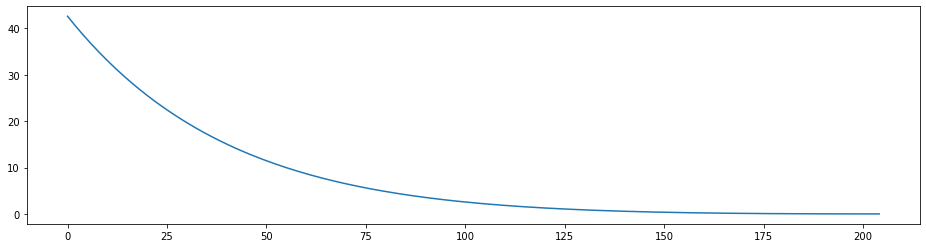

In [12]:
# predicting y for the train set and calculating the cost

weights_train, costs_train = grad_descent(alpha, x_train, y_train)
plot_costs(costs_train)

In [13]:
print(weights_train)
print(costs_train[len(costs_train)-1])

[0.009973254791945253, 0.6827554374541572, 0.4357970099774008, 0.050348952521936406]
3.016247325301351e-06


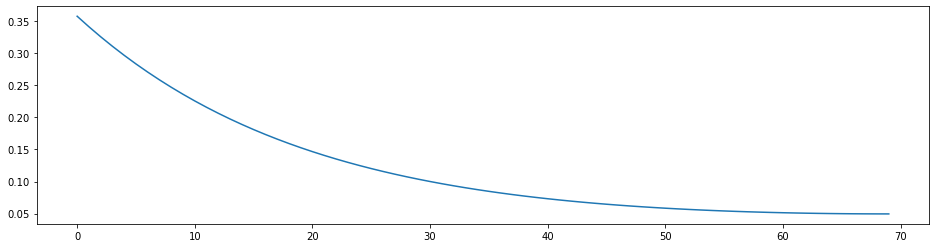

In [14]:
# predicting y for the test set and calculating the cost

weights_test, costs_test = grad_descent(alpha, x_test, y_test)
plot_costs(costs_test)

In [15]:
print(weights_test)
print(costs_test[len(costs_test)-1])

[-0.01750404383014608, 0.34987335415263915, 0.3055055701062212, 0.10200356201375751]
0.04947234299443457


### 6) Predict the quantitative response y on the train set

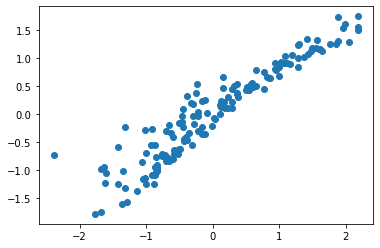

In [16]:
trpr = y_train.copy() #stands for training prediction
trpr = pd.DataFrame(trpr)
trpr['Predicted'] = (x_train['bias']*weights_train[0]) + (x_train['TV']*weights_train[1]) + (x_train['Radio']*weights_train[2]) + (x_train['Newspaper']*weights_train[3])

plt.scatter(trpr['Sales'],trpr['Predicted'])

### 7) Predict the quantitative response y on the test set
First using the gradient descent algorithm to predict y for test using the predictors in the test set

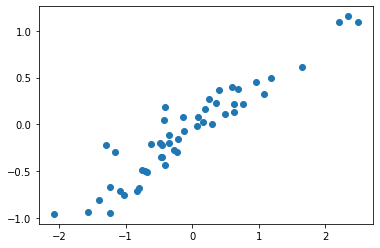

In [17]:
tepr = y_test.copy() #stands for training prediction
tepr = pd.DataFrame(tepr)
tepr['Predicted'] = (x_test['bias']*weights_test[0]) + (x_test['TV']*weights_test[1]) + (x_test['Radio']*weights_test[2]) + (x_test['Newspaper']*weights_test[3])

plt.scatter(tepr['Sales'],tepr['Predicted'])

Now using the gradient descent algorithm to predict y for test using the predictors in the training set

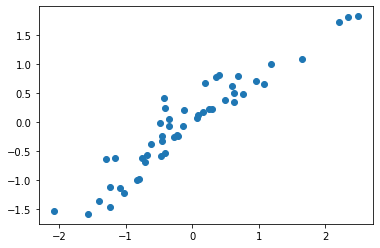

In [18]:
tepr = y_test.copy() #stands for training prediction
tepr = pd.DataFrame(tepr)
tepr['Predicted'] = (x_test['bias']*weights_train[0]) + (x_test['TV']*weights_train[1]) + (x_test['Radio']*weights_train[2]) + (x_test['Newspaper']*weights_train[3])

plt.scatter(tepr['Sales'],tepr['Predicted'])

### 8) Reverting Standardized Data to its original form

In [19]:
g = x.copy()
g['Sales'] = y
g = scaler.inverse_transform(g.values)
g = pd.DataFrame(g, columns = ['bias','TV','Radio','Newspaper','Sales'])

x['Prediction'] = (x['bias']*weights_train[0]) + (x['TV']*weights_train[1]) + (x['Radio']*weights_train[2]) + (x['Newspaper']*weights_train[3])
x = scaler.inverse_transform(x.values)
x = pd.DataFrame(x, columns = ['bias','TV','Radio','Newspaper','Predicted'])

In [20]:
x.insert(4, "Sales", g["Sales"])
x

,bias,TV,Radio,Newspaper,Sales,Predicted
0,158.234305,230.1,37.8,69.2,22.1,20.212910
1,158.234305,44.5,39.3,45.1,10.4,12.451059
2,158.234305,17.2,45.9,69.3,9.3,12.621007
3,158.234305,151.5,41.3,58.5,18.5,17.358607
4,158.234305,180.8,10.8,58.4,12.9,13.902112
...,...,...,...,...,...,...
195,158.234305,38.2,3.7,13.8,7.6,6.360069
196,158.234305,94.2,4.9,8.1,9.7,8.798633
197,158.234305,177.0,9.3,6.4,12.8,12.887498
198,158.234305,283.6,42.0,66.2,25.5,23.039755


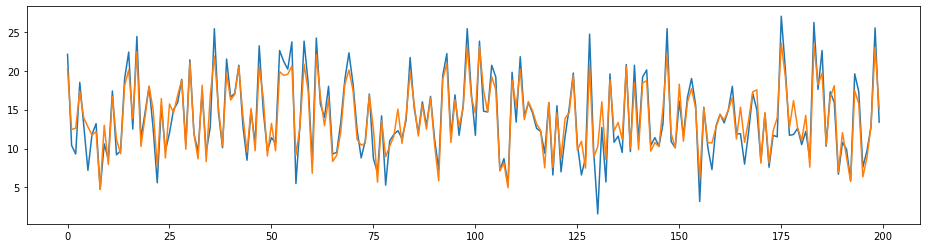

In [21]:
# sales vs prediction graph
plt.figure(figsize=(16,4))
plt.plot(x.iloc[:,4:])

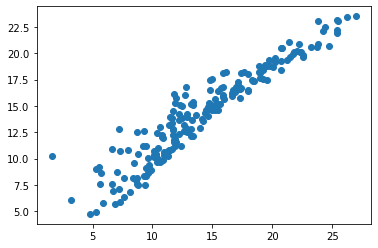

In [22]:
# Creating a scatterplot for y-hat(i) and y(i)
plt.scatter(x['Sales'],x['Predicted'])

### 9) Observe the cost results and analyse

As can be seen from the results shown in the graphs above, the gradient descent algorithm was successful in fitting a regression line onto the given data. In doing this, it provided us with a set of weights that could be plugged into a regression function to help predict sales based on the advertising budgets of various media forms.

In particular, this is visible in how when the generated weights were used in the regression function to create predicted values, both the line graph and the scatterplot shown above illustrate how these predicted values are very close to the original after reverting the standardization process.

# EXPERIMENTS FOR QUESTION SECTION

In [23]:
print('Weight of bias: ', weights_train[0])
print('Weight of TV: ', weights_train[1])
print('Weight of radio: ', weights_train[2])
print('Weight of newspaper: ', weights_train[3])

Weight of bias:  0.009973254791945253
Weight of TV:  0.6827554374541572
Weight of radio:  0.4357970099774008
Weight of newspaper:  0.050348952521936406


In [24]:
from sklearn.metrics import r2_score

# using sklearn to produce the r2 scores of the training and testing datasets
print ('TRAINING r2 SCORE: ', r2_score(trpr['Sales'],trpr['Predicted']))
print ('TESTING r2 SCORE: ', r2_score(tepr['Sales'],tepr['Predicted']))

TRAINING r2 SCORE:  0.8813043384764145
TESTING r2 SCORE:  0.885845827374728


In [25]:
# doing 5000 iterations

def grad_desc_5k(alpha, x_set, y_set):
    costs = []
    
    # initial calling of functions to make sure all our variables are in order before looping
    weights = initialize_weights()
    y_hat = predict(weights, x_set)
    cost = compute_cost(y_set.shape[0], y_hat, y_set)
    prev_cost = cost + 1                         # arbitrary value that just needs to be bigger than cost
    w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    
    # we're doing this 5000 times instead of waiting for convergence.
    for i in range (0,5000): 
        weights = update_weights(weights, w)     # update weights
        costs.append(cost)                       # update costs
        y_hat = predict(weights, x_set)          # predict new value for y-hat
        prev_cost = cost                         # update previous cost
        cost = compute_cost(y_set.shape[0], y_hat, y_set) # calculate new cost
        w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    return weights, costs

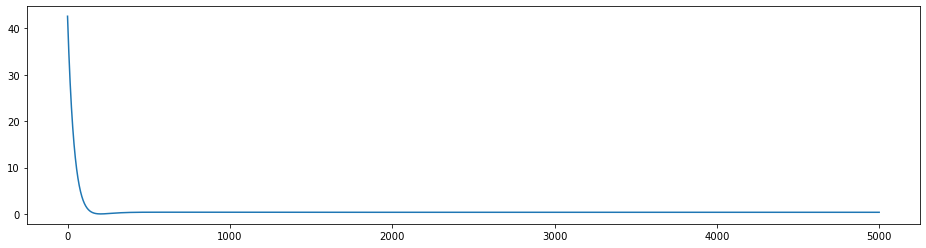

In [26]:
weights_5k, costs_5k = grad_desc_5k(alpha, x_train, y_train)
plot_costs(costs_5k)

In [27]:
print("5k cost:          ", costs_5k[len(costs_5k)-1], "     number of iterations: 5000")
print("convergence cost: ", costs_train[len(costs_train)-1], "   number of iterations: ", len(costs_train))

5k cost:           0.35085871197031293      number of iterations: 5000
convergence cost:  3.016247325301351e-06    number of iterations:  205


In [28]:
3.016247325301351e-06 < 0.35085871197031293

True

In [29]:
other = y_train.copy()
other = pd.DataFrame(other, columns=['Sales'])
other['Predicted'] = (x_train['bias']*weights_5k[0]) + (x_train['TV']*weights_5k[1]) + (x_train['Radio']*weights_5k[2]) + (x_train['Newspaper']*weights_5k[3])
other.head()

,Sales,Predicted
0,1.552053,1.254012
1,-0.696046,-0.363758
2,-0.907406,-0.388640
3,0.860330,0.668077
4,-0.215683,-0.121774


In [30]:
r2_score(other['Sales'],other['Predicted'])

0.8957583858078612

In [31]:
other['Error'] = other['Sales']-other['Predicted']
other['Error'].mean()

-2.4054832200211726e-17

In [32]:
trpr['Error'] = trpr['Sales']-trpr['Predicted']
trpr['Error'].mean()

0.0005029562702831221

In [33]:
-2.4054832200211726e-17 < 0.0005029562702831221

True

In [34]:
def grad(alpha, x_set, y_set):
    costs = []
    
    # initial calling of functions to make sure all our variables are in order before looping
    weights = initialize_weights()
    y_hat = predict(weights, x_set)
    cost = compute_cost(y_set.shape[0], y_hat, y_set)
    prev_cost = cost + 1                         # arbitrary value that just needs to be bigger than cost
    w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    
    for i in range (0,1000): 
        weights = update_weights(weights, w)     # update weights
        costs.append(cost)                       # update costs
        y_hat = predict(weights, x_set)          # predict new value for y-hat
        prev_cost = cost                         # update previous cost
        cost = compute_cost(y_set.shape[0], y_hat, y_set) # calculate new cost
        w = compute_gradient(y_set.shape[0], alpha, y_hat, y_set, x_set)
    return weights, costs

In [35]:
weights_1, costs_1 = grad(0.1, x_train, y_train)

In [36]:
weights_01, costs_01 = grad(0.01, x_train, y_train)

In [37]:
weights_001, costs_001 = grad(0.001, x_train, y_train)

In [38]:
weights_2, costs_2 = grad(0.2, x_train, y_train)

In [39]:
weights_0001, costs_0001 = grad(0.0001, x_train, y_train)

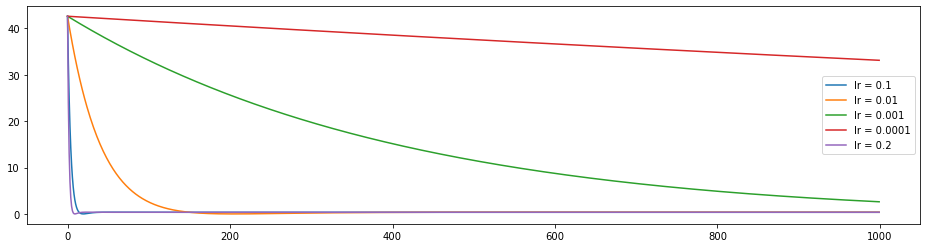

In [40]:
plt.figure(figsize=(16,4))
plt.plot(costs_1, label = "lr = 0.1")
plt.plot(costs_01, label = "lr = 0.01")
plt.plot(costs_001, label = "lr = 0.001")
plt.plot(costs_0001, label = "lr = 0.0001")
plt.plot(costs_2, label = "lr = 0.2")
plt.legend()
plt.show()

In [41]:
weights_1, costs_1 = grad_descent(0.1, x_train, y_train)

In [42]:
weights_01, costs_01 = grad_descent(0.01, x_train, y_train)

In [43]:
weights_001, costs_001 = grad_descent(0.001, x_train, y_train)

In [45]:
weights_2, costs_2 = grad_descent(0.2, x_train, y_train)

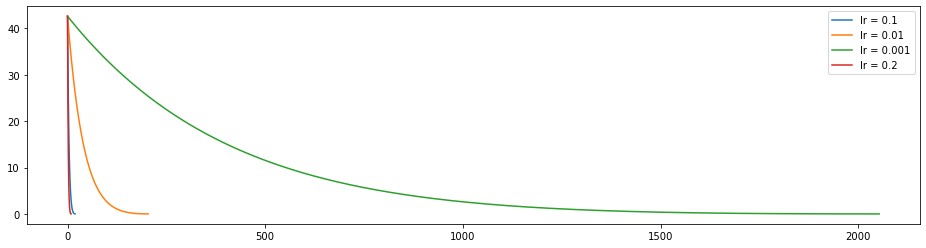

In [46]:
plt.figure(figsize=(16,4))
plt.plot(costs_1, label = "lr = 0.1")
plt.plot(costs_01, label = "lr = 0.01")
plt.plot(costs_001, label = "lr = 0.001")
plt.plot(costs_2, label = "lr = 0.2")
plt.legend()
plt.show()

CMSC 197 - Machine Learning - Aren Deza, 2019-50022, BS in Computer Science 4